# Retail Analysis With Walmart Sales Data

The objective is to determine the factors affecting the sales and to analyze  the impact of markdowns around holidays on the sales.

**Holidays**

- <strong>Super Bowl :</strong> 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- <strong>Labour Day :</strong> 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- <strong>Thanksgiving :</strong> 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- <strong>Christmas :</strong> 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Analysis Tasks

**Basic Statistics Tasks**

1. Which store has the maximum sales
2. Which store has maximum standard deviation
3. Which store/s has good quarterky growth rate in Q3'2012
4. Find out which holidays have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights

**Statistical Model**

For store 1 - Build prediction models to forecast demand (Linear Regression - utilize variables like date and restructure dates as 1 for feb 2010) <br>
Hypothesize if CPI, unemployement and fuel price have any impact on sales.
Change dates into days by creating new variable.
Select the model which gives the best accuracy.

## import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

In [11]:
# load data
retail_sales = pd.read_csv('WALMART_SALES_DATA.csv')
retail_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Data Understanding**

In [12]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


we can see that the data has 8 columns each with 0 null values.<br>
the data types for the column elements range from:-

- integer
- float
- object 

In [13]:
from datetime import datetime

retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])

/tmp/ipykernel_14956/3251297017.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])


In [14]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
retail_sales.shape

(6435, 8)

In [16]:
retail_sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


From the summary statistics of the numerical variables we see the :-

- mean
- standard deviation
- minimum values
- the quartiles (1<sup>st</sup> , 2<sup>nd</sup> and 3<sup>rd</sup> Quartiles)
- maximum values

of the dataset

/tmp/ipykernel_14956/2409486944.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=90)


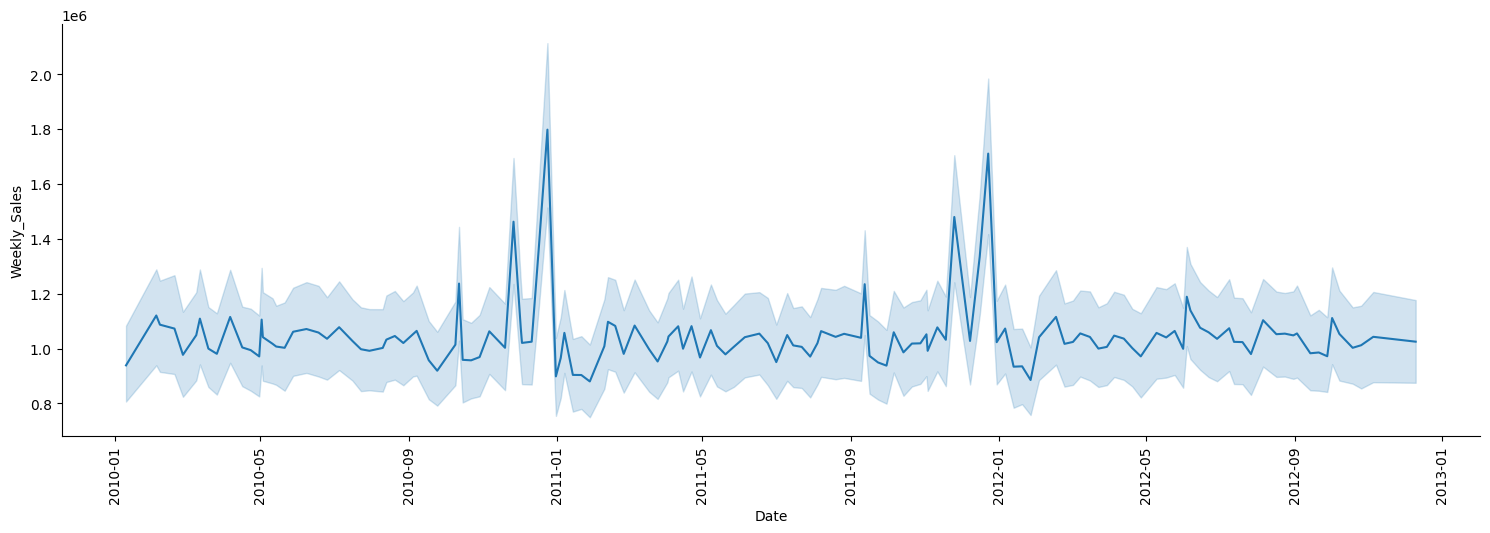

In [17]:
g = sns.relplot(data=retail_sales, x='Date', y='Weekly_Sales', kind='line', height=5, aspect=3)

ax = g.axes.flatten()[0]
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

ax.set_xticklabels(xticklabels, rotation=90)
ax.set_xticks(xticks)
plt.show()